In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Regression loss  
* MSE
* MAE
* Huber loss
* Los cosh loss
* Quantile loss

#### Mean Square Error (MSE/ L2 Loss)
$ MSE = \sum\limits_{i=1}^n  {(y_i - y_i^p)}^2 $  

In [4]:
def mse(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean square error loss
    """
    
    return np.sum((true - pred)**2)

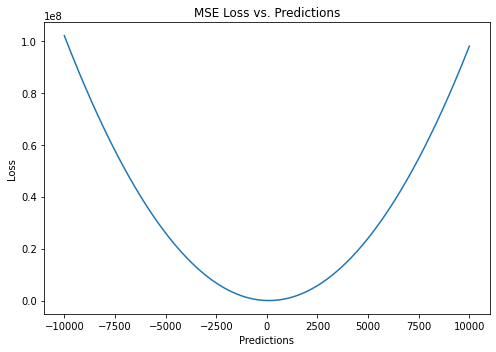

In [5]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(100, 10000) 
pred = np.arange(-10000,10000, 2)

loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]

# plot 
ax1.plot(pred, loss_mse)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("MSE Loss vs. Predictions")

fig.tight_layout()

#### Mean Absolute Error (MAE/ L1 loss)
$ MAE = \sum\limits_{i=1}^n  {|y_i - y_i^p|} $  

In [6]:
def mae(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean absolute error loss
    """
    
    return np.sum(np.abs(true - pred))

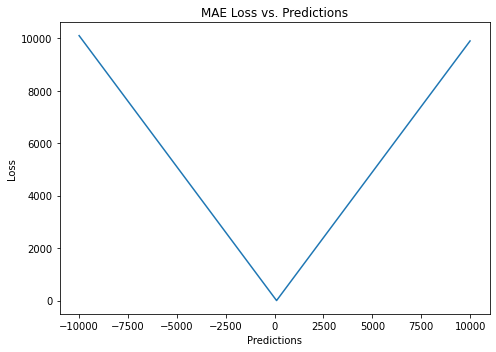

In [7]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(100, 10000) 
pred = np.arange(-10000,10000, 2)

loss_mae = [mae(target[i], pred[i]) for i in range(len(pred))]

# plot 
ax1.plot(pred, loss_mae)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("MAE Loss vs. Predictions")

fig.tight_layout()

#### Smooth Mean Absolute Error/ Huber Loss 

In [8]:
def sm_mae(true, pred, delta):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: smoothed mean absolute error loss
    """
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

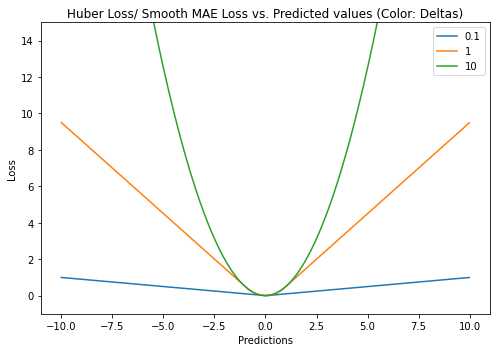

In [9]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)

delta = [0.1, 1, 10]

losses_huber = [[sm_mae(target[i], pred[i], q) for i in range(len(pred))] for q in delta]

# plot 
for i in range(len(delta)):
    ax1.plot(pred, losses_huber[i], label = delta[i])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Huber Loss/ Smooth MAE Loss vs. Predicted values (Color: Deltas)")
ax1.legend()
ax1.set_ylim(bottom=-1, top = 15)

fig.tight_layout()

# fig.savefig('/Users/princegrover/Documents/msan/Machine-Learning/images/huber.png' )

#### Log cosh loss
$ L(y, y^p) = \sum\limits_{i=1}^n  {\log(\cosh(y_i^p-y_i))} $  

In [10]:
def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return np.sum(loss)

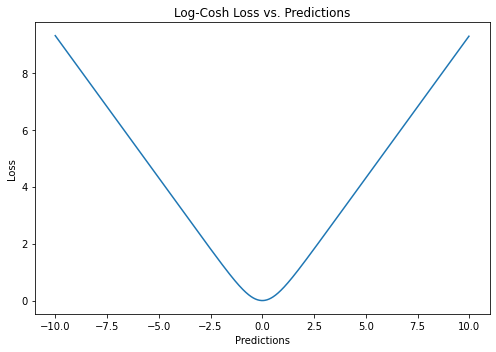

In [11]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)

loss_logcosh = [logcosh(target[i], pred[i]) for i in range(len(pred))]

# plot 
ax1.plot(pred, loss_logcosh)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Log-Cosh Loss vs. Predictions")

fig.tight_layout()

#### Quantile loss

 $ L_\gamma(y, y^p) = \sum\limits_{i=y_i<y_i^p}  ({\gamma-1}).|y_i - y_i^p| + \sum\limits_{i=y_i\geq y_i^p}  ({\gamma}).|y_i - y_i^p|  $  

In [12]:
def quan(true, pred, theta):
    loss = np.where(true >= pred, theta*(np.abs(true-pred)), (1-theta)*(np.abs(true-pred)))
    return np.sum(loss)

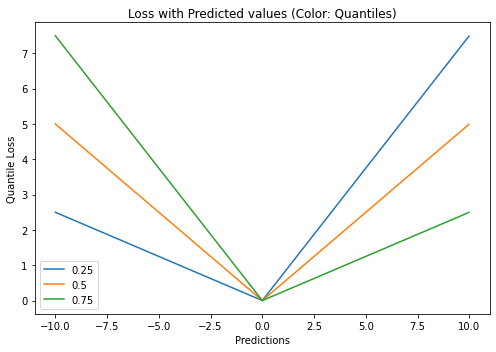

In [13]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)

quantiles = [0.25, 0.5, 0.75]

losses_quan = [[quan(target[i], pred[i], q) for i in range(len(pred))] for q in quantiles]

# plot 
for i in range(len(quantiles)):
    ax1.plot(pred, losses_quan[i], label = quantiles[i])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Quantile Loss')
ax1.set_title("Loss with Predicted values (Color: Quantiles)")
ax1.legend()

fig.tight_layout()

#### **All regression losses in single plot**

(0.0, 40.0)

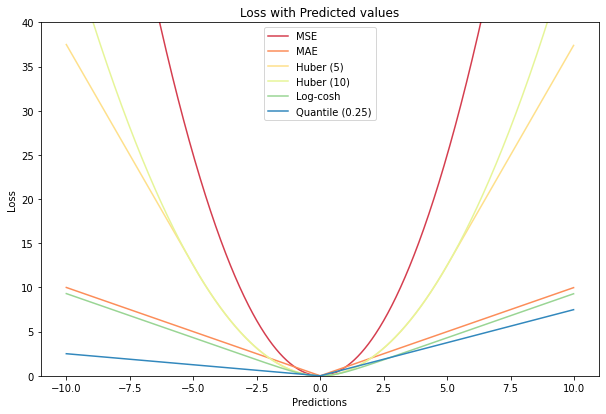

In [14]:
fig, ax1 = plt.subplots(1,1, figsize = (10,6.5))

target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)

# calculating loss function for all predictions. 
loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]
loss_mae = [mae(target[i], pred[i]) for i in range(len(pred))]
loss_sm_mae1 = [sm_mae(target[i], pred[i], 5) for i in range(len(pred))]
loss_sm_mae2 = [sm_mae(target[i], pred[i], 10) for i in range(len(pred))]
loss_logcosh = [logcosh(target[i], pred[i]) for i in range(len(pred))]
loss_quan1 = [quan(target[i], pred[i], 0.25) for i in range(len(pred))]


losses = [loss_mse, loss_mae, loss_sm_mae1, loss_sm_mae2, loss_logcosh, loss_quan1]
names = ['MSE', 'MAE','Huber (5)', 'Huber (10)', 'Log-cosh', 'Quantile (0.25)']
cmap = ['#d53e4f',
'#fc8d59',
'#fee08b',
'#e6f598',
'#99d594',
'#3288bd']

for lo in range(len(losses)):
    ax1.plot(pred, losses[lo], label = names[lo], color= cmap[lo])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Loss with Predicted values")
ax1.legend()
ax1.set_ylim(bottom=0, top=40)

# fig.savefig('/Users/princegrover/Documents/msan/Machine-Learning/images/all_regression.png' )

### Classifications loss

* Binary cross entropy 
* Negative log likelihood
* Cross entropy
* Kullback–Leibler divergence


Binary cross entropy or negative log likelihood

In [15]:
def bin_ce(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: binary cross entropy loss
    """
    loss = np.where(true==1, np.log(pred), np.log(1-pred))
    return -np.sum(loss)

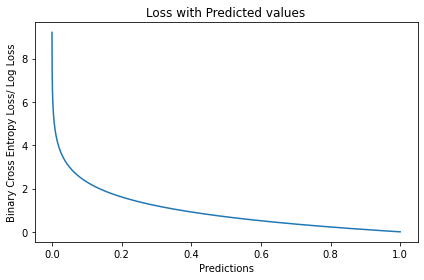

In [17]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_bin_ce = [bin_ce(target[i], pred[i]) for i in range(len(pred))]

# plot for binary cross entropy
ax1.plot(pred, loss_bin_ce)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Binary Cross Entropy Loss/ Log Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()
# fig.savefig()

Focal loss

In [18]:
def focal(true, pred, gamma):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: binary cross entropy loss
    """
    loss = np.where(true==1, (1-pred)**gamma*(np.log(pred)), pred**gamma*(np.log(1-pred)))
    return -np.sum(loss)

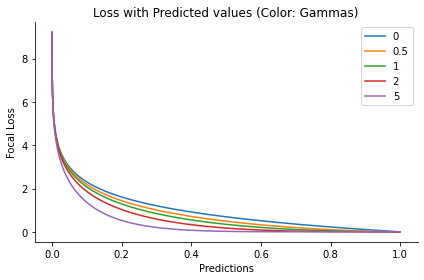

In [19]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
gammas = [0, 0.5, 1, 2, 5]
losses_focal = [[focal(target[i], pred[i], gamma) for i in range(len(pred))] for gamma in gammas]

# plot for binary cross entropy
for i in range(len(gammas)):
    ax1.plot(pred, losses_focal[i], label = gammas[i])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Focal Loss')
ax1.set_title("Loss with Predicted values (Color: Gammas)")
ax1.legend()

# make right and top lines invisible
ax1.spines['top'].set_visible(False)    # Make the top axis line for a plot invisible
ax1.spines['right'].set_visible(False) # Make the right axis line for a plot invisible

fig.tight_layout()

Hinge loss

In [20]:
def hinge(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = np.max((0, (1 - pred*true)))
    return np.sum(loss)

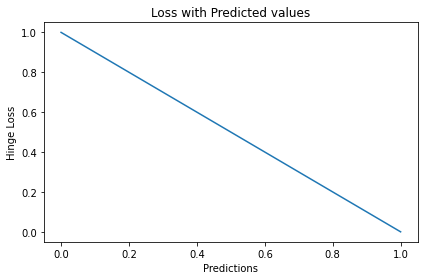

In [21]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_hinge = [hinge(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_hinge)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Hinge Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

Square loss

In [22]:
def sq_loss(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = (1 - pred*true)**2
    return np.sum(loss)

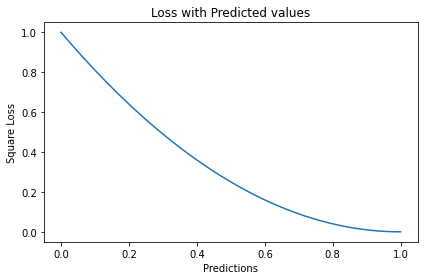

In [23]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_sq = [sq_loss(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_sq)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Square Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

Logistic loss

In [24]:
def log_loss(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = np.log(1 + np.exp(-(pred*true)))/np.log(2)
    return np.sum(loss)

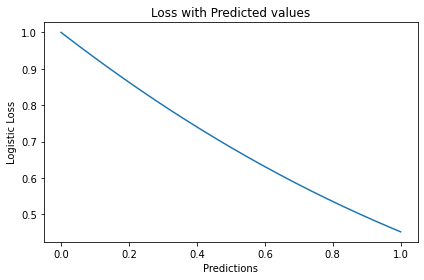

In [25]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_log_loss = [log_loss(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_log_loss)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Logistic Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

Exponential loss

In [30]:
def expo(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: exponential loss
    """
    loss = np.exp(-(pred*true))
    return np.sum(loss)

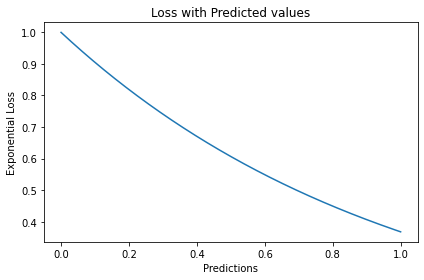

In [32]:
fig, ax1 = plt.subplots()

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_exp = [expo(target[i], pred[i]) for i in range(len(pred))]

# plot for exponential loss
ax1.plot(pred, loss_exp)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Exponential Loss')
ax1.set_title("Loss with Predicted values")
fig.tight_layout()

Kullback–Leibler divergence

In [33]:
def kld(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: KL divergence loss
    """
    loss = pred*(np.log(pred) - true)
    return np.sum(loss)

### Embedding loss (have 2 inputs and compare them)

* Hinge embedding criteria
* L1 Hinge embedding
* Cosine distance

### Miscelaneus losses

* Haversine distance
* Weighted average of muliple losses